In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
%cd /content/drive/My\ Drive/DL_Project
!git pull

/content/drive/My Drive/DL_Project
Already up to date.


In [0]:
# !mkdir data
# %cd data
# !gsutil -m cp gs://quickdraw_dataset/full/numpy_bitmap/*.npy .
# %cd ..

In [1]:
import numpy as np
import torch
import os
from matplotlib import pyplot as plt
from torch.utils.data import Dataset, DataLoader

%matplotlib inline 

In [30]:
class SketchDataSet(Dataset):
    """ Sketch datset """
    def __init__(self, directory):
        self.length = 0
        for filename in os.listdir(directory):
            if filename.endswith(".npy"): 
                data = np.load(directory + filename)
                self.length += len(data)

        self.data = [None]*self.length
        i = 0
        for filename in os.listdir(directory):
            j = 0
            data = np.load(directory + filename)
            for j in range(0, len(data)):
                self.data[i] = torch.from_numpy(data[j].reshape(28, 28) / 25)
                j += 1
            i += 1

    def __len__(self):
        return self.length

    def __getitem__(self, i):
        return self.data[i]

In [31]:
# If AttributeError: __enter__, update numpy version
dataset = SketchDataSet("./data/")

2684309


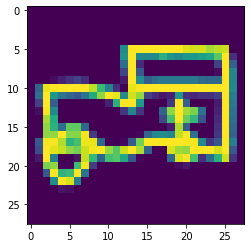

In [35]:
print(len(dataset))
plt.imshow(dataset[3])
plt.show()